### Reuters Dataset

In [1]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# Reverse word index mapping
word_index = reuters.get_word_index()
reverse_word_index = {index: word for word, index in word_index.items()}

# Choose a review to decode
review_index = 12
review = train_data[review_index]

# Decode the review
decoded_review = ' '.join(reverse_word_index.get(index - 3, '?') for index in review)

# Print the decoded review
print(decoded_review)

? ? corp said it reached an agreement in principal covering the acquisition of the company by privately held ? financial corp the agreement calls for ? to make a self tender offer for all of its outstanding stock at a price of 22 dlrs per share in cash ? headquartered in los angeles develops manages and ? real estate ? also said reuter 3


In [7]:
train_labels[12]

4

In [8]:
#same things in another way
word_index = reuters.get_word_index()
reverse_word_index = dict(
                           [(value, key) for (key, value) in word_index.items()] 
                            )
# Decode the review
decoded_review = ' '.join(reverse_word_index.get(index - 3, '?') for index in train_data[0])

# Print the decoded review
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [9]:
train_labels[0]

3

### Vectorizing the Data

In [10]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train.shape

(8982, 10000)

In [13]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

#### One Hot Encoding

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1
    return results

In [15]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### We can do the same thing using the Keras

In [17]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [18]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building NN Model

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

x_val.shape

(1000, 10000)

In [22]:
y_val = one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

y_val.shape

(1000, 46)

In [23]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 80ms/step - loss: 2.9847 - accuracy: 0.3755 - val_loss: 2.0806 - val_accuracy: 0.5550
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.7267 - accuracy: 0.6468 - val_loss: 1.4820 - val_accuracy: 0.6820
Epoch 3/20
16/16 [==============================] - 1s 58ms/step - loss: 1.2813 - accuracy: 0.7285 - val_loss: 1.2541 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 1.0445 - accuracy: 0.7752 - val_loss: 1.1491 - val_accuracy: 0.7440
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8773 - accuracy: 0.8120 - val_loss: 1.0594 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7464 - accuracy: 0.8346 - val_loss: 0.9941 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6319 - accuracy: 0.8643 - val_loss: 0.9520 - val_accuracy: 0.8030
Epoch 8/20
16

In [24]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.7903


[1.0563995838165283, 0.7902938723564148]

### Plotting the training loss and validation loss

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
train_losses = history_dict['loss']
val_losses = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(val_acc)+1)

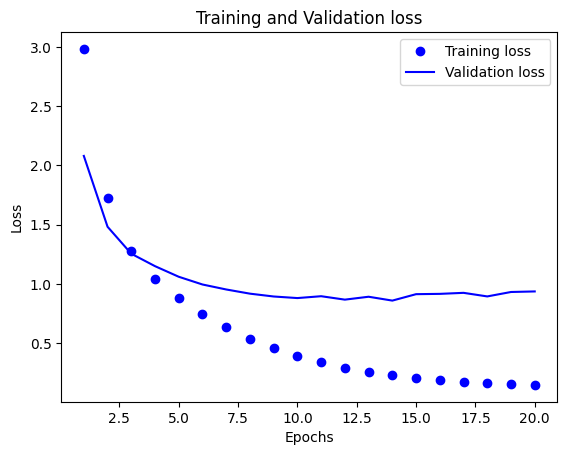

In [27]:
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### Training Accuracy vs Validation Accuracy

In [28]:
plt.clf()

<Figure size 640x480 with 0 Axes>

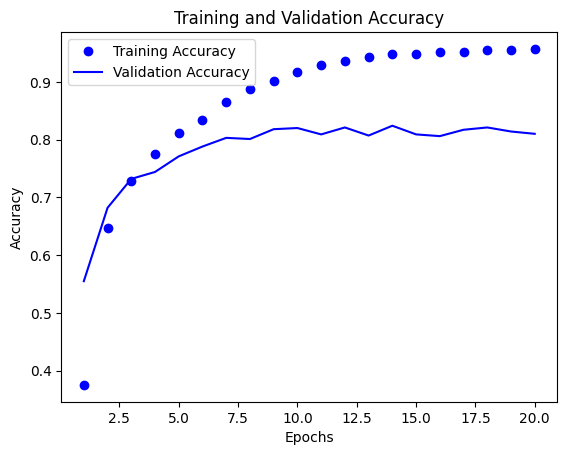

In [29]:
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### Try with 9 epochs as the model is overfitting after the 9th epochs

In [30]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))
model2.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model2.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.7188 - accuracy: 0.5039 - val_loss: 1.8324 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 0s 22ms/step - loss: 1.5232 - accuracy: 0.6824 - val_loss: 1.3553 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.1553 - accuracy: 0.7551 - val_loss: 1.1859 - val_accuracy: 0.7510
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.9387 - accuracy: 0.8019 - val_loss: 1.0600 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.7772 - accuracy: 0.8336 - val_loss: 0.9889 - val_accuracy: 0.8000
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6470 - accuracy: 0.8606 - val_loss: 0.9242 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5386 - accuracy: 0.8893 - val_loss: 0.9149 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [32]:
results = model2.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9479 - accuracy: 0.7863


[0.9478936791419983, 0.7862867116928101]

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.18210151380231523

### Generating Prediction on new data

In [34]:
predictions = model2.predict(x_test) 

71/71 [==============================] - 0s 4ms/step


In [35]:
predictions[0].shape 

(46,)

In [36]:
np.sum(predictions[0])

1.0000001

In [37]:
np.argmax(predictions[0])

3

### Different way to handle the labels and loss function

In [38]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [39]:
def vectorize_sequences (sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1
    return results

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [42]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))
model3.compile(optimizer ='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model3.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
18/18 [==============================] - 1s 18ms/step - loss: 3.0067 - accuracy: 0.4012
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.7253 - accuracy: 0.6587
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 1.2644 - accuracy: 0.7298
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0210 - accuracy: 0.7850
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.8474 - accuracy: 0.8222
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.7037 - accuracy: 0.8508
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5930 - accuracy: 0.8737
Epoch 8/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4968 - accuracy: 0.8962
Epoch 9/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4263 - accuracy: 0.9122


In [44]:
results = model3.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 4ms/step - loss: 0.9104 - accuracy: 0.7930


[0.9104333519935608, 0.792965292930603]

### Observe the changes inthe dimention of the intermediate hidden layer

In [45]:
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))
model4.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model4.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 34ms/step - loss: 3.7631 - accuracy: 0.0653 - val_loss: 3.6415 - val_accuracy: 0.0230
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 3.5559 - accuracy: 0.2783 - val_loss: 3.4479 - val_accuracy: 0.2720
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 3.3331 - accuracy: 0.1169 - val_loss: 3.2336 - val_accuracy: 0.1840
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 3.1031 - accuracy: 0.2372 - val_loss: 3.0230 - val_accuracy: 0.2480
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 2.8817 - accuracy: 0.2600 - val_loss: 2.8387 - val_accuracy: 0.2600
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 2.6738 - accuracy: 0.2772 - val_loss: 2.6613 - val_accuracy: 0.2670
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 2.4746 - accuracy: 0.2874 - val_loss: 2.4850 - val_accuracy: 0.2860
Epoch 8/9
16/16 [===

In [47]:
results = model4.evaluate(x_test, one_hot_test_labels)
results
# As we reduced the dimention of the hidden layer to 4, due to the low dimention compared to the number of classes (46), it is not performing well.

71/71 [==============================] - 0s 5ms/step - loss: 2.1910 - accuracy: 0.2841


[2.190962314605713, 0.284060537815094]

In [48]:
model5 = models.Sequential()
model5.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model5.add(layers.Dense(128, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))
model5.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model5.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 41ms/step - loss: 2.4007 - accuracy: 0.5284 - val_loss: 1.5238 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 24ms/step - loss: 1.2876 - accuracy: 0.7169 - val_loss: 1.2087 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 0s 24ms/step - loss: 0.9726 - accuracy: 0.7814 - val_loss: 1.0311 - val_accuracy: 0.7760
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.7563 - accuracy: 0.8276 - val_loss: 0.9849 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.5798 - accuracy: 0.8771 - val_loss: 0.9607 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 0s 24ms/step - loss: 0.4615 - accuracy: 0.8993 - val_loss: 0.9081 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 0s 23ms/step - loss: 0.3686 - accuracy: 0.9204 - val_loss: 0.8636 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [50]:
results = model5.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9559 - accuracy: 0.7876


[0.9558642506599426, 0.7876224517822266]

#### Try with 250 units

In [51]:
model6 = models.Sequential()
model6.add(layers.Dense(250, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(250, activation='relu'))
model6.add(layers.Dense(46, activation='softmax'))
model6.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model6.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 43ms/step - loss: 2.1424 - accuracy: 0.5396 - val_loss: 1.3753 - val_accuracy: 0.6880
Epoch 2/9
16/16 [==============================] - 1s 33ms/step - loss: 1.1725 - accuracy: 0.7360 - val_loss: 1.0830 - val_accuracy: 0.7530
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 0.8516 - accuracy: 0.8107 - val_loss: 0.9405 - val_accuracy: 0.7970
Epoch 4/9
16/16 [==============================] - 1s 32ms/step - loss: 0.6280 - accuracy: 0.8602 - val_loss: 0.8947 - val_accuracy: 0.8060
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.4771 - accuracy: 0.8948 - val_loss: 0.8556 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 33ms/step - loss: 0.3697 - accuracy: 0.9182 - val_loss: 0.8305 - val_accuracy: 0.8280
Epoch 7/9
16/16 [==============================] - 1s 32ms/step - loss: 0.2811 - accuracy: 0.9360 - val_loss: 0.8527 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [52]:
results = model6.evaluate(x_test, one_hot_test_labels)
results
# The accuracy increased slightly

71/71 [==============================] - 0s 6ms/step - loss: 0.9570 - accuracy: 0.7996


[0.9569647312164307, 0.7996438145637512]

### Try to change the number of layers

In [53]:
partial_x_train.shape

(7982, 10000)

In [54]:
model6 = models.Sequential()
model6.add(layers.Dense(250, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(250, activation='relu'))
model6.add(layers.Dense(250, activation='relu')) #added this layer
model6.add(layers.Dense(46, activation='softmax'))
model6.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model6.fit(partial_x_train, partial_y_train, epochs=9, batch_size=350, validation_data = (x_val, y_val))

Epoch 1/9
23/23 [==============================] - 1s 33ms/step - loss: 2.0193 - accuracy: 0.5333 - val_loss: 1.3558 - val_accuracy: 0.6820
Epoch 2/9
23/23 [==============================] - 1s 25ms/step - loss: 1.1388 - accuracy: 0.7347 - val_loss: 1.0804 - val_accuracy: 0.7510
Epoch 3/9
23/23 [==============================] - 1s 26ms/step - loss: 0.8227 - accuracy: 0.8104 - val_loss: 1.0207 - val_accuracy: 0.7640
Epoch 4/9
23/23 [==============================] - 1s 26ms/step - loss: 0.5705 - accuracy: 0.8664 - val_loss: 0.9927 - val_accuracy: 0.7930
Epoch 5/9
23/23 [==============================] - 1s 26ms/step - loss: 0.4238 - accuracy: 0.9023 - val_loss: 0.8687 - val_accuracy: 0.8240
Epoch 6/9
23/23 [==============================] - 1s 26ms/step - loss: 0.2917 - accuracy: 0.9315 - val_loss: 0.9420 - val_accuracy: 0.8000
Epoch 7/9
23/23 [==============================] - 1s 26ms/step - loss: 0.2420 - accuracy: 0.9406 - val_loss: 0.9441 - val_accuracy: 0.8060
Epoch 8/9
23/23 [===

In [55]:
results = model6.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 1s 7ms/step - loss: 1.0341 - accuracy: 0.7881


[1.034122109413147, 0.7880676984786987]

In [56]:
model6 = models.Sequential()
model6.add(layers.Dense(135, activation='relu', input_shape=(10000,)))
model6.add(layers.Dense(46, activation='softmax'))
model6.compile(optimizer ='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model6.fit(partial_x_train, partial_y_train, epochs=9, batch_size=250, validation_data = (x_val, y_val))

Epoch 1/9
32/32 [==============================] - 1s 22ms/step - loss: 1.9277 - accuracy: 0.6257 - val_loss: 1.2651 - val_accuracy: 0.7320
Epoch 2/9
32/32 [==============================] - 1s 19ms/step - loss: 0.9824 - accuracy: 0.7922 - val_loss: 0.9949 - val_accuracy: 0.8000
Epoch 3/9
32/32 [==============================] - 1s 16ms/step - loss: 0.6775 - accuracy: 0.8603 - val_loss: 0.8826 - val_accuracy: 0.8200
Epoch 4/9
32/32 [==============================] - 0s 16ms/step - loss: 0.4914 - accuracy: 0.9007 - val_loss: 0.8271 - val_accuracy: 0.8220
Epoch 5/9
32/32 [==============================] - 0s 14ms/step - loss: 0.3744 - accuracy: 0.9213 - val_loss: 0.7850 - val_accuracy: 0.8320
Epoch 6/9
32/32 [==============================] - 0s 15ms/step - loss: 0.2964 - accuracy: 0.9357 - val_loss: 0.7794 - val_accuracy: 0.8360
Epoch 7/9
32/32 [==============================] - 0s 16ms/step - loss: 0.2429 - accuracy: 0.9436 - val_loss: 0.7909 - val_accuracy: 0.8310
Epoch 8/9
32/32 [===

In [57]:
results = model6.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 4ms/step - loss: 0.8807 - accuracy: 0.8090


[0.8807295560836792, 0.8089937567710876]